# Machine Learning (laboratory instruction)
## Linear regression (part 4)

### The goal
The goal is to use linear regression to approximate a function that is not linear.

### Task. Computer Virus.
Read the data from the `virus.npz` file. This is a dataset with information about the spread of XXYZ0123 virus that took over many computers a few years back. The $x$ contains a number of hours (counting from first reported detections), and the $y$ contains the number of infected computers.

**Task**: Your task is to approximate the spread function. Note that this time the function is not linear.
Subtasks:
* Display the data on the chart (scatter plot)
* Use gradient descent to find a solution.
* Answer how many computers were infected:
    * a) after 30 day, 
    * b) after two months (60 days)?
    * c) Display both predictions on the chart.

**Tip**: To approximate a different function using linear regression you need to change the input data (the $x$ in this case). For instance, if you wish to approximate $f(x) = \sqrt{x}$ all you need to do is create a new input: $x' = \sqrt{x}$ and perform exactly the same steps as in previous laboratory, but using $x'$ instead of $x$.

**Tip 2**: You may need to use a different learning rate for bias.

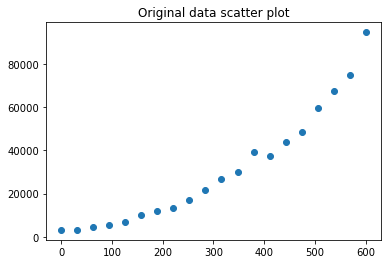

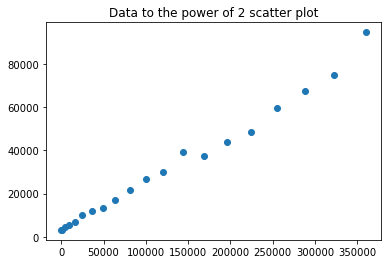

In [65]:
import numpy as np
import matplotlib.pyplot as plt

with open('virus.npz', 'rb') as f:
    data = np.load(f)
    x_start, y = data['x'], data['y']

def fun(a, b, x):
    return a*x+b

plt.title("Original data scatter plot")
plt.scatter(x_start, y)
plt.show()
x = x_start**2
plt.title("Data to the power of 2 scatter plot")
plt.scatter(x, y)

In [70]:
alpha = 0.00000000000005

def der_a(a, b):
    total_der_a = 0
    for i in range(len(x)):
        der_a = (fun(a, b, x[i]) - y[i])*x[i]
        total_der_a += der_a
        i += 1
    return 2*total_der_a/len(x)
    
def der_b(a, b):
    total_der_b = 0
    for i in range(len(x)):
        der_b = fun(a, b, x[i]) - y[i]
        total_der_b += der_b
        i += 1
    return 2*total_der_b/len(x)   

def min_a(a, b):
    return a - alpha*der_a(a, b)

def min_b(a, b):
    return b - alpha*der_b(a, b)

epochs = 50000
def step(a, b):
    following_steps = []
    for i in range(epochs):
        following_steps.append((a , b))
        a = min_a(a,b)
        b = min_b(a,b)
    return following_steps

val_a_b = step(1,1)

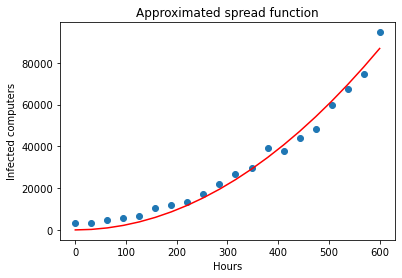

In [71]:
plt.title("Approximated spread function")
plt.xlabel("Hours")
plt.ylabel("Infected computers")
plt.scatter(x_start, y)
plt.plot(x_start, fun(val_a_b[-1][0],val_a_b[-1][1], x), color="red")

In [72]:
predictions = [30*24, 60*24]
y_30 = fun(val_a_b[-1][0],val_a_b[-1][1], predictions[0]**2)
y_60 = fun(val_a_b[-1][0],val_a_b[-1][1], predictions[1]**2)

print(f"After 30 days there was {y_30 = } computers infected")
print(f"After 60 days there was {y_60 = } computers infected")

After 30 days there was y_30 = 125015.66913951414 computers infected
After 60 days there was y_60 = 500059.67654824175 computers infected


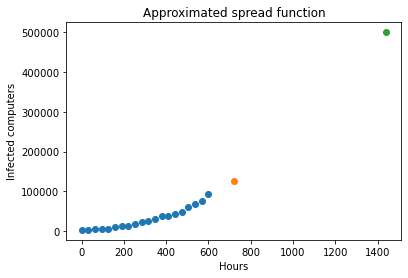

In [73]:
plt.title("Approximated spread function")
plt.xlabel("Hours")
plt.ylabel("Infected computers")
plt.scatter(x_start,y)
plt.scatter(predictions[0], y_30)
plt.scatter(predictions[1], y_60)